## A classification task: record label recognition


In [1]:
#Basic imports
import os
import matplotlib.pyplot as plt
import essentia.standard as ess
import essentia
import numpy as np
import sys

In [2]:
# Raw-data preprocess analysis parameters
fs = 44100
windowSize = 4096 * 4
hopSize = 4096 * 2
NRG_threshold_ratio = 0.01 #threshold expressed as ratio with respect to the maximum value
V_threshold = 0.01 #waveform threshold value
#Let's put in a container to be able to use as a single argument in function calls
params = {"fs":fs, "windowSize":windowSize, "hopSize":hopSize, "V_threshold":V_threshold}

## Analysis and preprocessing of features



In [3]:
import pandas as pd

In [4]:
#Read 
file = 'NRG_chunks_60s/data_NRG_chunks.csv'
data = pd.read_csv(file)
#Let's see the first lines of our data
print(data.shape)
data.head()

(2169, 111)


,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio,label
0,0.910765,16.098446,6.338432,0.241379,0.111715,46.924519,79.560425,4.221815,3.367910,12.454635,...,2.196676,0.673815,0.739093,0.728032,0.708472,0.586992,0.261938,434.193115,0.952503,suaraarchive
1,0.986817,19.774338,5.499098,0.229802,0.093665,90.388428,156.160583,6.724589,5.231849,15.081498,...,2.208174,0.730480,0.522006,0.524449,0.532374,0.694661,0.162979,434.193115,0.870256,suaraarchive
2,0.938583,16.176191,6.751721,0.284246,0.144061,161.995728,271.977234,7.188392,6.698478,11.475939,...,2.764393,0.749109,0.548903,0.537396,0.507856,0.617403,0.234334,434.193115,0.901224,suaraarchive
3,0.966188,15.957705,5.426711,0.291083,0.100589,29.491970,45.206833,3.644614,2.712965,7.396576,...,1.999750,0.613102,0.597520,0.602500,0.599450,0.372409,0.203670,434.193115,0.886189,suaraarchive
4,0.977140,13.993910,5.854078,0.139587,0.062564,9.888686,13.695549,2.452261,1.568712,16.762283,...,1.865814,0.738228,0.607261,0.617219,0.628088,0.460922,0.237604,434.193115,0.974838,suaraarchive


In [5]:
data.isnull().sum().sum()#sums a matrix of True/False values obtained by checking if each value is Nan

0

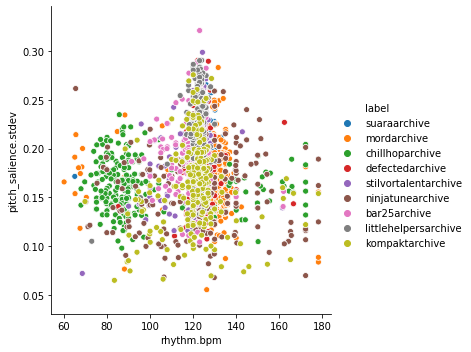

In [6]:
import seaborn as sns
# hue -> Grouping variable that will produce elements with different colors
# style -> Grouping variable that will produce elements with different styles
sns.relplot(x = "rhythm.bpm", y = "pitch_salience.stdev", hue = "label", data = data);

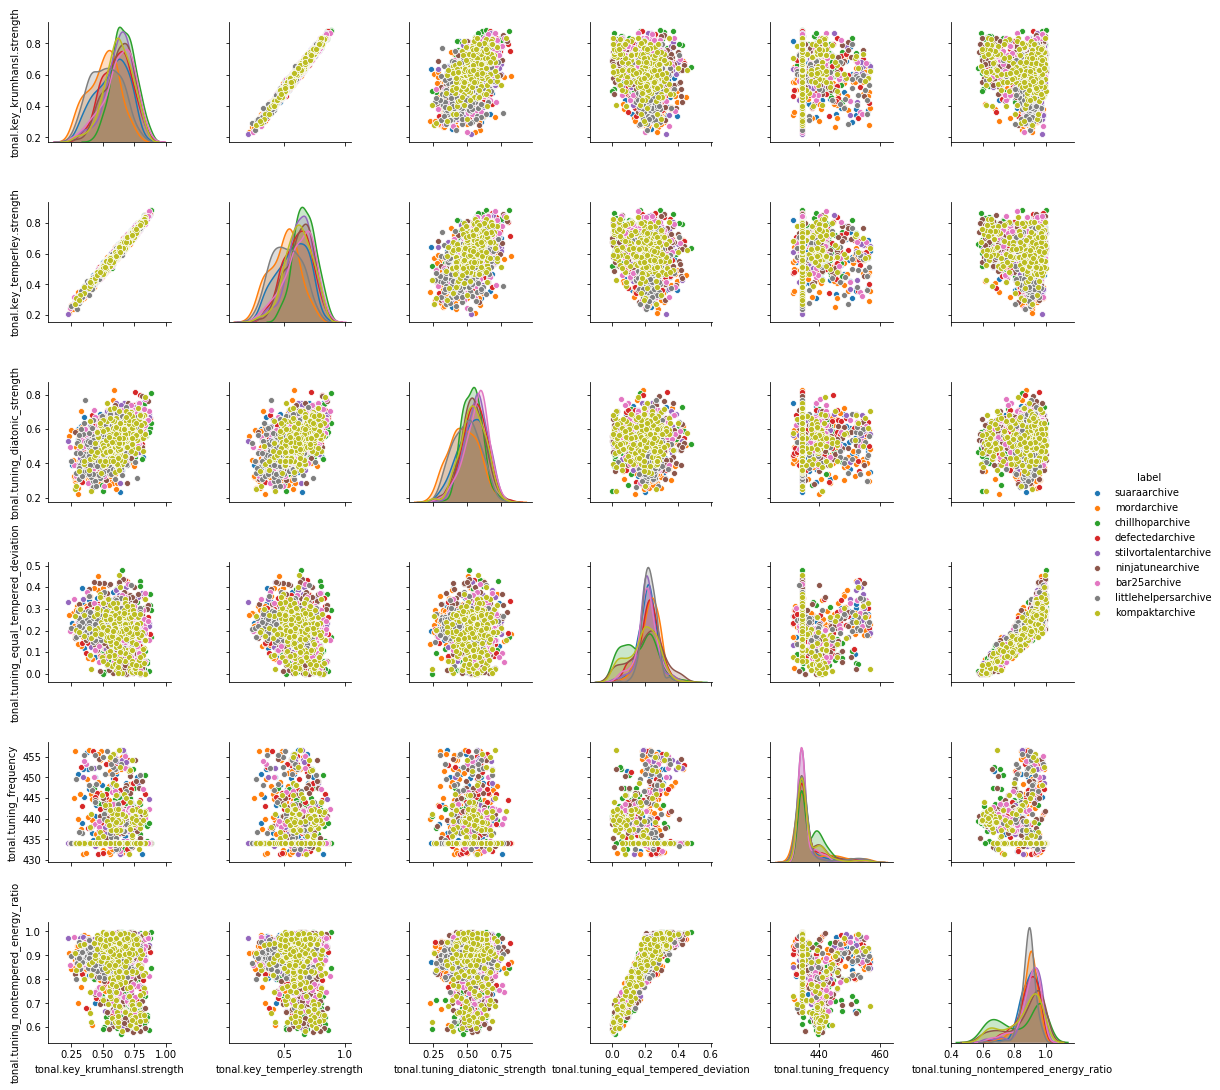

In [7]:
sns.pairplot(data.iloc[:, -7:], hue = "label");

In [8]:
#Descriptive statistics of the features:
data.describe()

,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_crest.stdev,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio
count,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,...,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000
mean,0.931534,15.420300,5.738400,0.253317,0.107595,64.692145,138.389576,4.208402,3.978179,15.466900,...,5.726840,2.142300,0.725884,0.598704,0.599294,0.596711,0.534267,0.210779,436.306308,0.879173
std,0.104675,2.595127,1.026206,0.075939,0.036590,66.621644,183.110565,1.864407,2.047498,7.844373,...,1.099336,0.343251,0.094814,0.126387,0.126776,0.125672,0.098043,0.077666,4.579414,0.091445
min,0.006685,5.487680,1.603244,0.087828,0.020523,-0.322660,0.855919,-0.343051,0.439624,0.460437,...,3.424867,1.036134,0.468511,0.222297,0.223399,0.208261,0.222347,0.000000,431.443085,0.571301
25%,0.929751,13.628940,5.041226,0.199582,0.082871,21.937651,41.918957,2.914141,2.499859,9.538741,...,4.919257,1.895295,0.660262,0.514436,0.515118,0.512414,0.471382,0.176557,434.193115,0.851396
50%,0.965710,15.382379,5.756649,0.243514,0.103226,44.343365,91.356773,3.988528,3.644823,14.550626,...,5.534368,2.124959,0.726027,0.613100,0.611522,0.608416,0.539834,0.217964,434.193115,0.902321
75%,0.980494,17.236723,6.461269,0.297814,0.129353,83.571404,181.208511,5.268922,5.076480,20.163689,...,6.338340,2.377108,0.788793,0.690254,0.692029,0.689694,0.603959,0.257287,435.700531,0.942780
max,0.989786,24.063929,8.431031,0.641144,0.258330,957.267090,5221.410645,14.810649,24.494722,67.384773,...,10.365827,3.419932,1.097769,0.882702,0.884921,0.882998,0.826891,0.478155,456.570251,0.998800




### Preprocessing of the features

**Normalisation of the features**

In [9]:
data_modif = data.copy()
#Let's use sklearn's preprocessing tools for applying normalisation to features
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_modif.iloc[:,:110] = min_max_scaler.fit_transform(data.iloc[:,:110].values)

In [10]:
data_modif.describe()

,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_crest.stdev,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio
count,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,...,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000
mean,0.940746,0.534695,0.605636,0.299086,0.366144,0.067894,0.026345,0.300353,0.147102,0.224230,...,0.331650,0.464035,0.409011,0.569964,0.568228,0.575706,0.515960,0.440819,0.193544,0.720170
std,0.106474,0.139701,0.150298,0.137244,0.153865,0.069572,0.035075,0.123033,0.085117,0.117213,...,0.158384,0.143993,0.150677,0.191378,0.191643,0.186253,0.162177,0.162428,0.182250,0.213906
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.938933,0.438262,0.503528,0.201972,0.262180,0.023246,0.007866,0.214944,0.085647,0.135650,...,0.215300,0.360417,0.304726,0.442364,0.440981,0.450772,0.411939,0.369247,0.109445,0.655194
50%,0.975510,0.532653,0.608309,0.281369,0.347774,0.046644,0.017335,0.285843,0.133244,0.210539,...,0.303921,0.456760,0.409237,0.591762,0.586713,0.593054,0.525168,0.455844,0.109445,0.774317
75%,0.990548,0.632477,0.711508,0.379504,0.457638,0.087610,0.034547,0.370337,0.192760,0.294411,...,0.419751,0.562537,0.508983,0.708591,0.708411,0.713512,0.631239,0.538084,0.169436,0.868959
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#input values put in a matrix, there are 110 features
x = data_modif.iloc[:,:110]
#Creating output values
data_modif.label = pd.Categorical(data_modif.label)#convert to categorical data
y = np.array(data_modif.label.cat.codes) #create label encoded outputs
#Print the first sample
print("Features of the first sample: ", x.values)
print("Class of the first sample: ", y[0])

Features of the first sample:  [[0.91962044 0.57120068 0.69351727 ... 0.54781072 0.10944451 0.89170388]
 [0.99697945 0.76908196 0.57058813 ... 0.34085002 0.10944451 0.69931076]
 [0.94791701 0.57538589 0.75404772 ... 0.49008034 0.10944451 0.77175087]
 ...
 [0.86620313 0.50547546 0.53010501 ... 0.12759513 0.10944451 0.27303457]
 [0.99730715 0.5734184  0.50917653 ... 0.57041639 0.10944451 0.85975278]
 [0.99783511 0.42962307 0.31011306 ... 0.84137246 0.84324609 0.97499373]]
Class of the first sample:  8


In [12]:
print(y.shape)

(2169,)


In [13]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=100)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(100,'Score'))  #print k best features

                                     Specs       Score
49                 silence_rate_60dB.stdev  105.438251
45                 silence_rate_20dB.stdev   91.685348
19                 erbbands_kurtosis.stdev   71.233868
21                 erbbands_skewness.stdev   66.178825
75                  spectral_rolloff.stdev   62.145851
..                                     ...         ...
80                spectral_strongpeak.mean    9.567997
106         tonal.tuning_diatonic_strength    9.356975
96                tonal.chords_number_rate    8.956571
90    rhythm.bpm_histogram_second_peak_bpm    8.901793
107  tonal.tuning_equal_tempered_deviation    8.569278

[100 rows x 2 columns]


In [14]:
X_new = bestfeatures.fit_transform(x, y)

In [15]:
print ( X_new.shape)

(2169, 100)


In [16]:
from numpy import save
save('y.npy', y)

## SVM TRAINING AND TESTING

In [17]:
#All output values: 
print(y)

[8 8 8 ... 3 3 3]


**Splitting data into train and test subsets**

In [18]:
#Let's split data into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 42) #random_state = 20 or 42

In [19]:
print("Size of train features matrix: ",X_train.shape, ", Size of train output vector: ",y_train.shape)
print("Size of test features matrix: ",X_test.shape, ", Size of test output vector: ",y_test.shape)

Size of train features matrix:  (1735, 100) , Size of train output vector:  (1735,)
Size of test features matrix:  (434, 100) , Size of test output vector:  (434,)


**Defining the machine learning model and training it**

Now we can train a machine learning model. Let's pick a Support Vector Machine (SVM) model and feed our data to train it.

In [22]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate 
#clf = svm.SVC(gamma = 1 / (X_train.shape[-1] * X_train.var()))
tuned_parameters = [{'gamma': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]}]
                    
 #cross-validation for gamma:
clf = GridSearchCV(svm.SVC(), tuned_parameters, cv=10) #C-Support Vector Classification based on libsvm

scores = cross_validate (clf, X_new, y, cv=10, return_estimator=True)
clf= scores ['estimator'][int(np.argmax(scores['test_score']))]
clf.fit(X_train, y_train)   


print(clf.best_params_)                    

{'gamma': 1}


**Testing the model**



In [23]:
y_pred = clf.predict(X_test)

In [24]:
#Let's check for each sample in the test set if prediction matches the true class information
y_test == y_pred

array([ True,  True, False, False,  True,  True,  True, False, False,
        True,  True,  True, False,  True, False, False, False, False,
        True, False, False, False, False,  True,  True, False, False,
        True,  True,  True,  True,  True, False, False,  True,  True,
       False,  True,  True, False, False,  True,  True, False, False,
       False,  True, False,  True, False, False,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True, False,  True, False, False,  True, False, False,
        True,  True, False, False, False,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
       False, False,

In [25]:
#Data is balanced, so you can use accuracy as a measure:
print("accuracy: ", np.sum(y_test == y_pred)/len(y_test))

accuracy:  0.576036866359447


**Observation:** the accuracy looks good but keep in mind that we have a small dataset and simply obtained a random subset for testing


As the final step, let's also print the **confusion matrix**

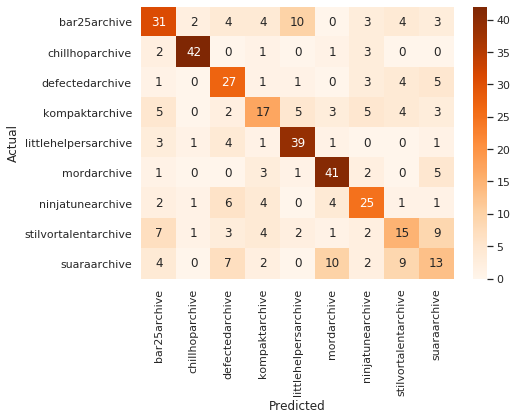

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

classes = np.unique(data_modif.label)
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = classes, index = classes)
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'
plt.figure(figsize = (7, 5))
sns.set(font_scale = 1)
sns.heatmap(conf_mat, cmap = "Oranges", annot_kws = {"size": 12}, annot = True);

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.51      0.53        61
           1       0.89      0.86      0.88        49
           2       0.51      0.64      0.57        42
           3       0.46      0.39      0.42        44
           4       0.67      0.78      0.72        50
           5       0.67      0.77      0.72        53
           6       0.56      0.57      0.56        44
           7       0.41      0.34      0.37        44
           8       0.33      0.28      0.30        47

    accuracy                           0.58       434
   macro avg       0.56      0.57      0.56       434
weighted avg       0.57      0.58      0.57       434



In [28]:
import sklearn.metrics
sklearn.metrics.hamming_loss(y_test, y_pred, sample_weight=None)

0.423963133640553

## Other ML FW


In [ ]:
import warnings
warnings.filterwarnings('ignore')#suppress warnings
#importing various classifiers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    #SVC(gamma = 1 / (X_train.shape[-1] * X_train.var())),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    MLPClassifier(alpha=1, max_iter=1000),
    GaussianNB()]

names = ["KNN", "Linear SVM", "Gaussian Process","Neural Net", "Naive Bayes"] #"RBF SVM"

#Creating empty list of scores for each classifier, we will append test results to these lists 
scores = {}
for name in names:
    scores[name] = []

#Let's split our data into test and train
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

#Let's run 10 random experiments, collect scores for each classifier 
num_tests = 10
for iteration_number in range(num_tests):
    x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = 1/num_tests, random_state = iteration_number)
    #normalisation of the data (learned from training data, applied to test data)
    scaler = StandardScaler().fit(x_train)
    norm_x_train = scaler.transform(x_train)
    norm_x_val = scaler.transform(x_val)
    
    # test over each classifier
    for name, clf in zip(names, classifiers):
        clf.fit(norm_x_train, y_train)#train
        score = clf.score(norm_x_val, y_val)#test
        scores[name].append(score)

for name, score in scores.items():
    print("{0}: acc = {1:1.2f}, +-{2:1.2f},\tvalues: {3}".format(name, np.mean(score), np.std(score), np.around(score, decimals = 2)))

### How about Deep Learning?

We would often prefer deep learning based architectures when the data size is large. See Andrew Ng's figure from his [Coursera course](https://www.coursera.org/learn/neural-networks-deep-learning/):

<img src=https://raw.githubusercontent.com/mbadry1/DeepLearning.ai-Summary/master/1-%20Neural%20Networks%20and%20Deep%20Learning/Images/11.png width="700">

The data size in our case is small and the methods examplified above are just fine. Below, for the sake of presenting an example using a deep learning architecture, we build (with Keras) and train a DNN using the same features. For cases with larger data sets, feature extraction step can be dropped and end-to-end systems(audio->label) can be designed. Due to the size of our data, we will stick with our features.


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
#Let's start by splitting our data 
X_train_val, X_test, y_train_val, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 42)
#..and apply normalisation
scaler = StandardScaler().fit(X_train_val)
norm_x_train_val = scaler.transform(X_train_val)
norm_x_test = scaler.transform(X_test)

Our neural network will have 4 neurons at the output layer each of which will output the estimated probability of the sample belonging to a class. So, let's convert our labels to **one-hot encoding** to fit to that representation.
Example: a sample belonging to the 'violin' class is represented with 3 (integer encoded) will be represented with  [0 0 0 1]. Similarly, a 'ebclar' sample represented with with 0 will be represented with [1 0 0 0]

In [22]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
y_train_val_onehot = onehot_encoder.fit_transform(y_train_val.reshape(len(y_train_val), 1))
y_test_onehot = onehot_encoder.fit_transform(y_test.reshape(len(y_test), 1))
print("One-hot encoded y_train_val shape = ", y_train_val_onehot.shape)
print("One-hot encoded y_test shape = ", y_test_onehot.shape)

One-hot encoded y_train_val shape =  (1735, 9)
One-hot encoded y_test shape =  (434, 9)


**Let's define our deep learning architecture**

In [30]:
!pip3 install keras

In [21]:
!pip3 install tensorflow

In [23]:
from keras.models import Sequential
from keras import layers

def compose_model(num_features):
    
    model = Sequential()

    # Input layer 
    model.add(layers.BatchNormalization(name='InputLayer', input_shape=(num_features,)))
    
    # 1. hidden layer
    model.add(layers.Dense(name='HiddenLayer_1', units = 110))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('tanh'))
    model.add(layers.Dropout(0.3))

    # 2. hidden layyer
    model.add(layers.Dense(name='HiddenLayer_2', units = 50))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.3))

    # Output layer
    model.add(layers.Dense(name='Output_layer', units = 9))
    model.add(layers.Activation('softmax'))
    
    return model

model = compose_model(X_train_val.shape[1])

Using TensorFlow backend.


You can have a look at the summary of the model

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (BatchNormalizati (None, 100)               400       
_________________________________________________________________
HiddenLayer_1 (Dense)        (None, 110)               11110     
_________________________________________________________________
batch_normalization_1 (Batch (None, 110)               440       
_________________________________________________________________
activation_1 (Activation)    (None, 110)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110)               0         
_________________________________________________________________
HiddenLayer_2 (Dense)        (None, 50)                5550      
_________________________________________________________________
batch_normalization_2 (Batch (None, 50)               

Let's pick an optimizer, compile the model and train the network

from keras.optimizers import SGD
opt = SGD(lr=0.01)
model.compile(loss = "binary_crossentropy", optimizer = opt, metrics = ['acc'])

In [25]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['acc'])
summary = model.fit(X_train_val, y_train_val_onehot, batch_size = 50, epochs = 50, validation_split=0.2, verbose=0,)

Testing the trained model

In [26]:
score = model.evaluate(X_test, y_test_onehot, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.190842955343185
Test accuracy: 0.5829492807388306


It is a good and common practice to check the learning curves

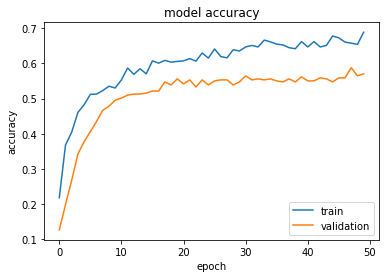

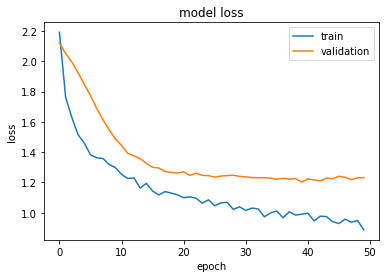

In [27]:
# summarize history for accuracy
plt.plot(summary.history['acc'])
plt.plot(summary.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(summary.history['loss'])
plt.plot(summary.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [28]:
import sklearn
y=model.predict(X_test)
print(np.argmax(y))

3484


In [29]:
y_pred = y.argmax(axis=1)

In [30]:
sklearn.metrics.f1_score(y_test, y_pred, average='micro')

0.5829493087557603

In [31]:
import sklearn.metrics
sklearn.metrics.hamming_loss(y_test, y_pred, sample_weight=None)

0.41705069124423966

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.38      0.40        61
           1       0.88      0.92      0.90        49
           2       0.54      0.67      0.60        42
           3       0.52      0.39      0.44        44
           4       0.64      0.72      0.68        50
           5       0.75      0.83      0.79        53
           6       0.53      0.48      0.50        44
           7       0.43      0.50      0.46        44
           8       0.44      0.36      0.40        47

    accuracy                           0.58       434
   macro avg       0.57      0.58      0.57       434
weighted avg       0.57      0.58      0.58       434



**Saving the model**

In [52]:
model.save("boc_60s/kerasmodel60s.h5")
print("Model Saved")

Model Saved


## Model Prediction on New Data

In [58]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('boc_60s/kerasmodel60s.h5')
# summarize model.
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (BatchNormalizati (None, 110)               440       
_________________________________________________________________
HiddenLayer_1 (Dense)        (None, 1)                 111       
_________________________________________________________________
batch_normalization_3 (Batch (None, 1)                 4         
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1)                 0         
_________________________________________________________________
HiddenLayer_2 (Dense)        (None, 3)                 6         
_________________________________________________________________
batch_normalization_4 (Batch (None, 3)                

In [ ]:
# load dataset
dataset = loadtxt("boc_60s/data_1mn_only_9.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# evaluate the model
score = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))